
<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/14zSOmdu6bdqw-uaDRTpgRnSfsDi90DbU/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosII.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>
    
---

# <strong>Los datos hablan I</strong>

En este Notebook, realizaremos una **visualización gráfica** de los datos de temperatura obtenidos de las [estaciones](https://class.redclara.net/halley/moncora/intro.html) meteorológicas de la red RACIMO-Móncora para un periodo de tiempo determinado. Para esto, utilizaremos pricipalmente las librerias de Python [MakeSens](https://docs.makesens.co/help/api-sdk/makesensapi-en-python) para acceder a los datos, [Pandas](https://pandas.pydata.org/) para manejarlos y [Matplotlib](https://matplotlib.org/) para visualizarlos.



## **Motivación**

Deseamos analizar los datos de las estaciones y queremos hacer graficas visualmente atractivas. La meta es obtener gráficos dicientes y simples que nos permitan interpretar y extraer conclusiones. Primero, tomaremos unos datos y los graficaremos de una manera simple.

In [ ]:
pip install --update

In [1]:
!pip install APIMakeSens

In [2]:
from MakeSens import MakeSens
import numpy as np
import pandas as pd

In [5]:
estacion = 'mE1_00008'           # Nombre estacion miniEva
start = '2023-08-06 00:00:00'    # Fecha de inicio: año-mes-día hora:minuto:segundo
end   = '2023-08-10 00:00:00'    # Fecha de fin:    año-mes-día hora:minuto:segundo
frec  = '1T'                      # m: minutos, h: horas, d: días

data = MakeSens.download_data(estacion, start, end,frec) # Descargar los datos

In [6]:
temp = data[['ts',"temperatura", "temperatura2"]].copy()   # Seleccionamos Tiempo, Temperatura 1, Temperatura 2
temp.columns = ['ts', 'T1','T2']                           # Renombramos columnas
temp = temp.set_index('ts')                                # Fijamos índices
temp.index = pd.to_datetime(temp.index)                    # Convertimos el indice a formato datetime

In [7]:
import matplotlib.pyplot as plt

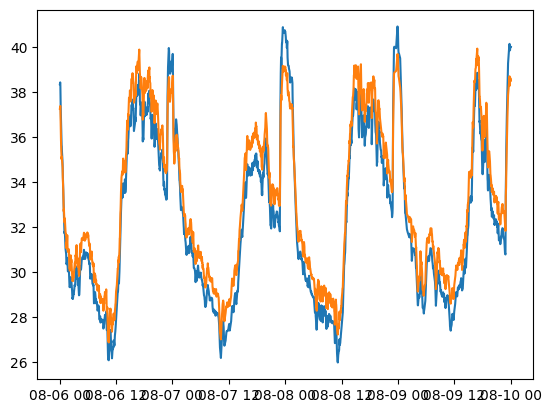

In [8]:
plt.plot(temp['T1'])
plt.plot(temp['T2'])

Podemos mejorar la grafica anterior en almenos los siguientes aspectos:
* Color de línea
* Tipo de línea
* Marcas de puntos
* Fechas en el eje x

## **Visualización de datos Introducción básica**

In [9]:
import matplotlib.pyplot as plt

La estructura básica en `matplotlib.pyplot` es `plt.figure()`. Las `figures` son como los lienzos en blancos en donde vamos a hacer nuestras pinturas de visualización de datos. Son el background o fondo donde vamos a dibujar los trazos.

In [10]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

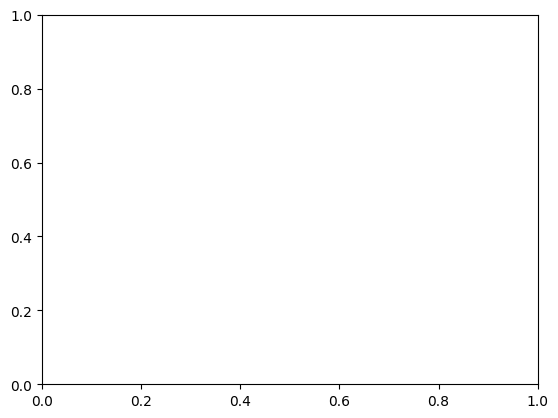

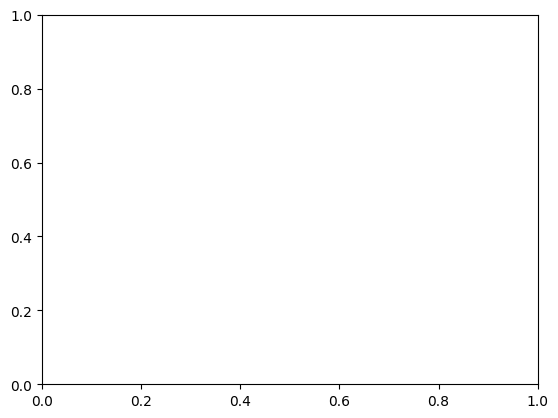

In [11]:
fig = plt.figure()
ax = fig.gca()       # gca() significa: Get the current axes -> Obten los ejes actuales
fig

En un lienzo de python podemos graficar puntos, líneas y sombreados.

In [12]:
# Datos
import numpy as np
x = np.linspace(0,10,20)
y = np.random.random(20)

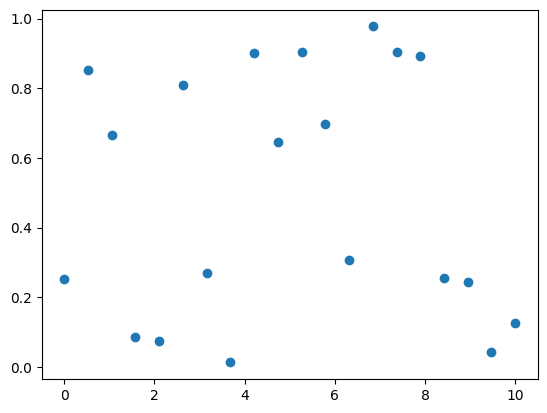

In [13]:
# Figura
fig = plt.figure()
plt.plot(x,y,'o')

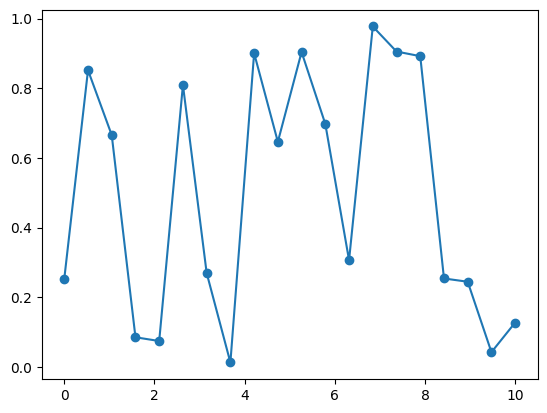

In [14]:
# Figura
fig = plt.figure()
plt.plot(x,y,'o-')

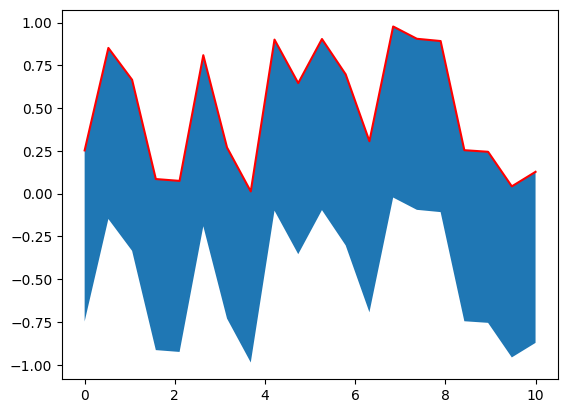

In [15]:
# Figura
fig = plt.figure()
plt.plot(x,y,'-',color='red')
plt.fill_between(x,y,y-1)

**Atributos de `plt.plot`**

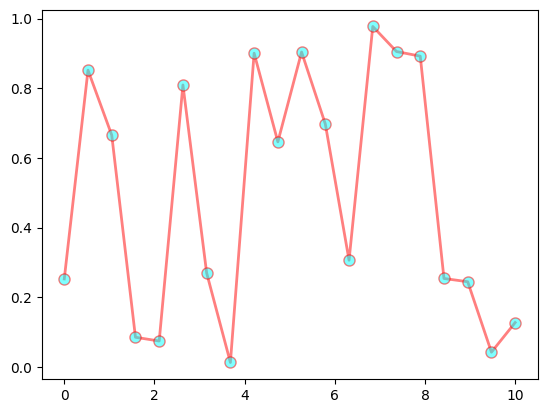

In [16]:
fig = plt.figure()
plt.plot(x,                        # Datos eje x
        y,                         # Datos eje y
       '-or',                      # Formato corto: 'linea-marcadores-color'
        markerfacecolor = 'cyan',  # Color marcador                             # mfc
        label = 'Datos',           # Etiquetas
        alpha = 0.5,               # Transparencia
        markersize = 8,           # Marker size -> tamaño marcadores           # ms
        linewidth  = 2)          # Linewidth -> grosor de línea               # lw

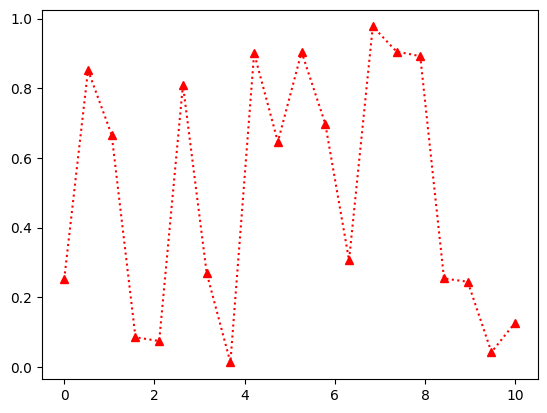

In [17]:
plt.plot(x,y,color='red',linestyle=':',marker='^')

Estilos de línea (ver más [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle))
|Estilo de línea|Significado|
|--|--|
|`-`|sólido|
|`--`|segmentado|
|`-.`|línea segmento-punto|
|`:`|línea punteada|
|` `|no línea|

Estilos de marcadores (ver más [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle))
|Marcador|Significado|
|--|--|
|`.`|punto|
|`,`|pixel|
|`o`|círculo|
|`v`|triángulo abajo|
|`^`|triángulo arriba|
|`<`|triángulo izquierda|
|`>`|triángulo derecha|
|`*`|estrella|
|`h`|hexágono|
|`p`|pentágono|

Estilos de colores (ver más [aquí](https://matplotlib.org/stable/gallery/color/named_colors.html))
|Denominacion|Color [inglés]|Color  [español]|
|--|--|--|
|`b`|blue|azúl|
|`r`|red|rojo|
|`g`|green|verde|
|`c`|cyan|celeste|
|`m`|magenta|magenta|
|`y`|yellow|amarillo|
|`k`|black|negro|
|`w`|white|blanco|
|`p`|pink|rosado|
|`violet`|violet|violeta|

En `matplotlib` también se puede usar el nombre del color (`green`) o su formato hexadécimal (`#008000`). Por ejemplo, valla a este [enlace](https://htmlcolorcodes.com/) para probar con diferentes colores en formato hexadécimal.

Aquí hay una documentación completa de [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

**Sub-gráficas**

Son otro aspecto importante que permite graficar varias imágenes una al lado de otra.

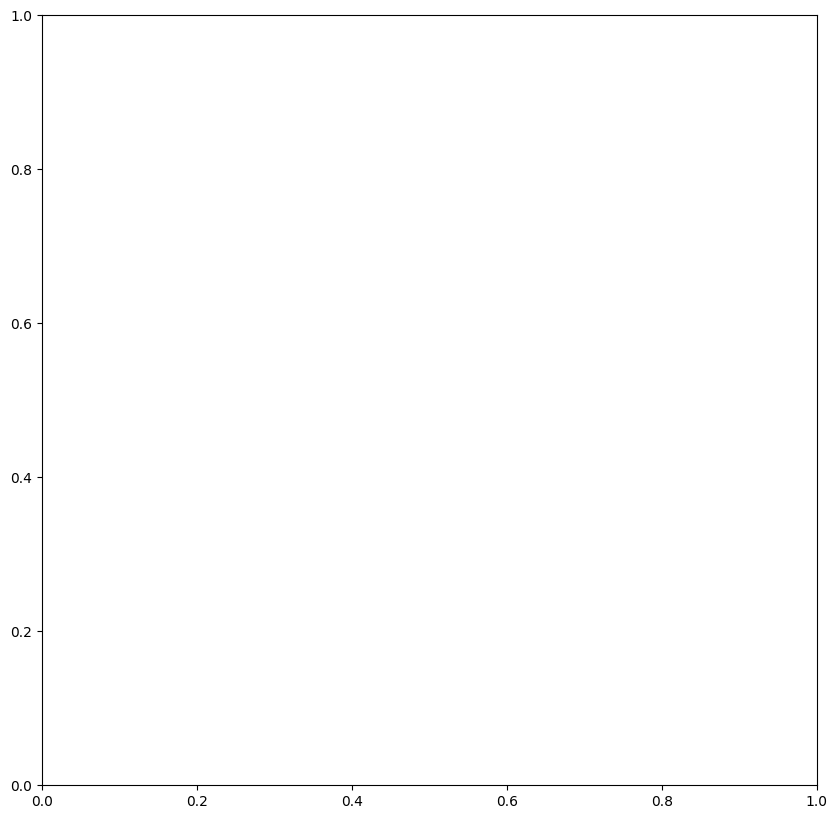

In [18]:
fig  = plt.figure(figsize=(10,10))
ax = fig.gca()

<Axes: >

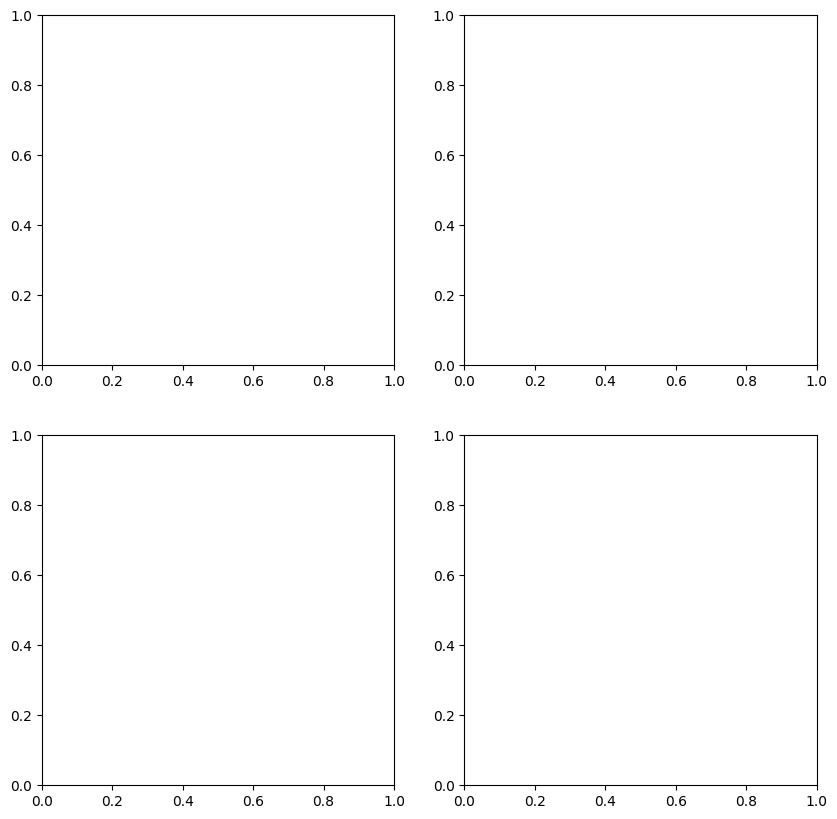

In [19]:
fig  = plt.figure(figsize=(10,10))
plt.subplot(221)
#plt.plot(x,y)

plt.subplot(222)
#plt.plot(x,y,'--*r')

plt.subplot(223)
#plt.plot(x,y,'.g',ms=10)

plt.subplot(224)
#plt.plot(x,y**2,'-.',ms=10)

## **Visualización de datos avanzada**

Podemos mejorar las gráficas en los siguientes aspectos:
* Título.
* Nombres de los ejes X, Y.
* Formato de fechas en el eje X.
* Posición de las barras indicadoras sobre los ejes.

**Algunos datos útiles**

In [20]:
## Columna promedio
temp['mean'] = temp.mean(axis=1)

## Datos remuestreados
temp_h = temp.resample('h').mean()          # Remuestreo por hora
temp_d = temp.resample('d').mean()          # Remuestreo por día
temp_m = temp.resample('10 min').mean()     # Remuestreo por 10 minutos

In [21]:
import matplotlib.dates as mdates

### **Titulos y etiquetas**

In [30]:
x = np.linspace(0,1,30)
y = np.random.random(30)
fechas = temp_h.index[0:30]

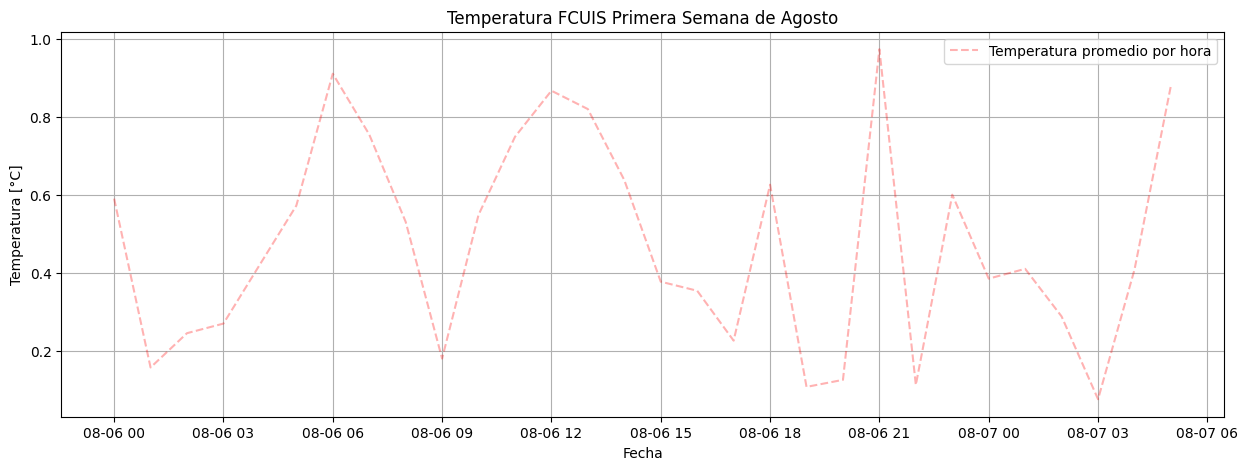

In [35]:
## Generamos la figura
fig = plt.figure(figsize=(15, 5))

# Graficamos los datos
plt.plot(fechas, y, '--r', label="Temperatura promedio por hora", alpha=0.3)

# Configuraciones finales
# Agregamos la leyenda y los titulos
plt.xlabel('Fecha')                       # Etiqueta eje X
plt.ylabel("Temperatura [°C]")            # Etiqueta eje Y
plt.title("Temperatura FCUIS Primera Semana de Agosto") # Título
plt.grid(True)                            # Malla cuadriculada
plt.legend()                              # Mostrar labels
plt.show()                                # Mostrar gráfica

### **xaxis, Etiquetas y malla**

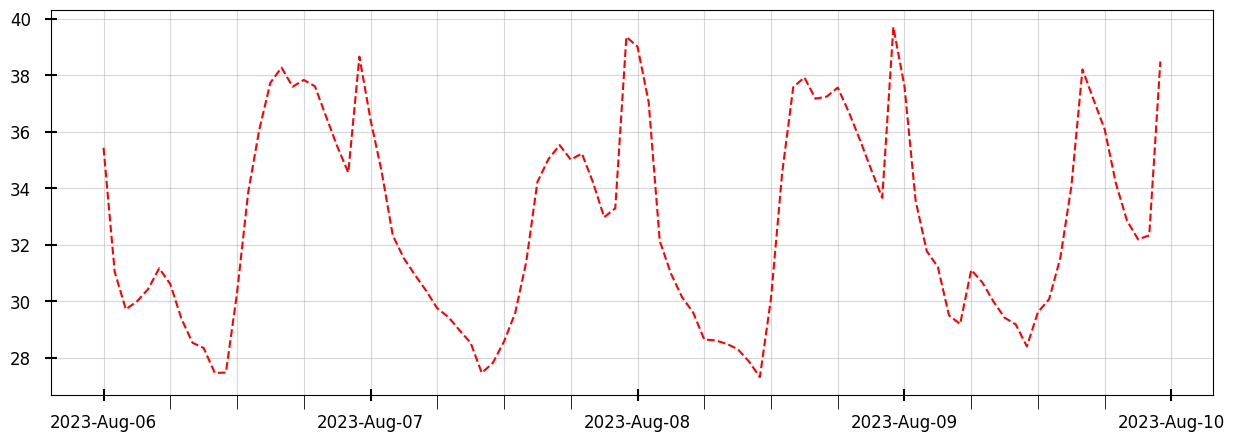

In [85]:
fig = plt.figure(figsize=(15, 5))

plt.plot(temp_h['mean'], '--r')

#Malla
plt.grid(True, alpha=0.5, which='both')  # wich : ['major', 'minor', 'both']

#Dimensiones Ticks 
ax = fig.gca()
ax.tick_params( which='major',        # Major ticks: subdividen los ejes en unidades mayores
                pad=10,               # Distancia entre etiquetas y ticks
                width=1.5,            # Ancho del tick
                length=8,             # Largo del tick 
                direction="inout",    # 'inout': ticks en la mitad de los ejes, 'in': ticks adentro de los ejes, 'out': ticks afuera de los ejes 
                labelsize=12)         # Tamaño de letra de la etiqueta

ax.tick_params(which='minor',         # Minor ticks: subdividen las unidades mayores
                length=10)            # Largo del tick 

# Formato y posiciones de ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))  # Formato de fecha: %b: mes, %d: día, %Y: año
ax.xaxis.set_major_locator(mdates.DayLocator())                 # Posiciona ticks mayores en cada día
ax.xaxis.set_minor_locator(mdates.HourLocator([0,6,12,18]))     # Posiciona ticks menores en las horas 0.00 am, 6.00 am, 12.00 m, 6.00 pm

plt.show()

> `mdates.DateFormatter` solo funciona si el eje x dentro de `plot()` es un `DatetimeIndex` o si está en formato de fecha.

Formatos de fechas

|Directiva|Significado|Ejemplo|
|--|--|--|
|`%w`|Día de la semana como número decimal. 0 es domingo y 6 es sábado|0, ..., 6|
|`%d`|Día del mes como número decimal|01, 02, ..., 31|
|`%m`|Mes como número decimal|01, 02, ..., 12|
|`%y`|Año sin las centenas como número decimal|00, 01, ..., 99|
|`%b`|Mes como su nombre abreviado (en Inglés)|Jan, Feb, ..., Dec|
|`%a`|Día de la semana como su nombre abreviado (en Inglés)|Sun, Mon, ..., Sat|

[Tabla de formato de fechas](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

### **El atributo fontsize**

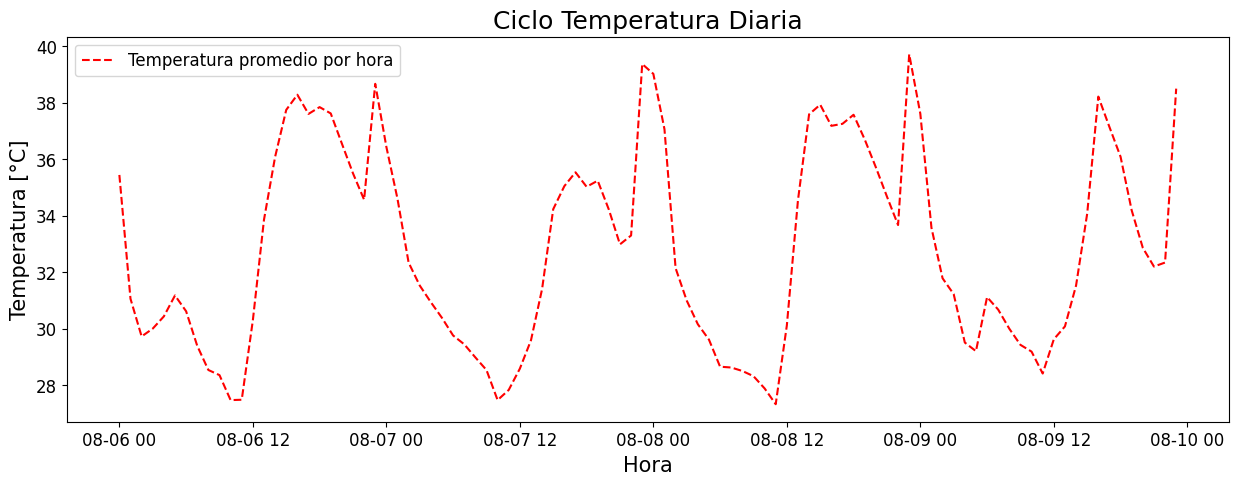

In [24]:
#Generamos la figura
fig = plt.figure(figsize=(15, 5))
ax  = fig.gca()
plt.plot(temp_h['mean'], '--r', label='Temperatura promedio por hora')

# Etiquetas
plt.ylabel("Temperatura [°C]",        fontsize=15)  # Etiqueta eje Y
plt.xlabel("Hora",                    fontsize=15)  # Etiqueta eje X
plt.title("Ciclo Temperatura Diaria", fontsize=18)  # Título

plt.legend(fontsize=12)    # Mostrar labels
plt.xticks(fontsize=12)    # Ajustar tamaño de letra eje X
plt.yticks(fontsize=12)    # Ajustar tamaño de letra eje Y

plt.show()

### **Un Ejemplo útil**

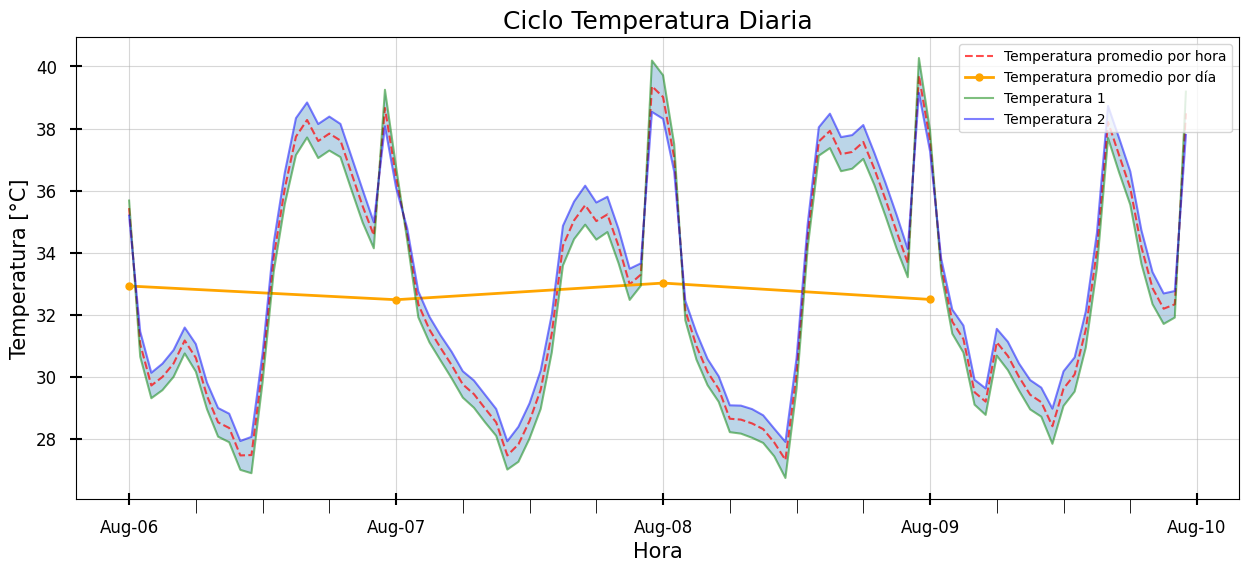

In [25]:
## Generamos la figura
fig = plt.figure(figsize=(15, 6))
ax = fig.gca()

# Graficamos los datos

# Lineas
plt.plot(temp_h['mean'],  '--r', label="Temperatura promedio por hora", ms=4, alpha=0.7)                #ms: marksize
plt.plot(temp_d['mean'],  '-o',  label="Temperatura promedio por día",  ms=5, lw=2, color="orange")     #lw: linewidth
plt.plot(temp_h['T1'],    '-g',  label="Temperatura 1", alpha=0.5)
plt.plot(temp_h['T2'],    '-b',  label="Temperatura 2", alpha=0.5)

# Sombreado
plt.fill_between(temp_h.index, y1 = temp_h.T1, y2 = temp_h.T2, alpha=0.3)

# Configuraciones finales
# Etiquetas
plt.ylabel("Temperatura [°C]",        fontsize=15)  # Etiqueta eje Y
plt.xlabel("Hora",                    fontsize=15)  # Etiqueta eje X
plt.title("Ciclo Temperatura Diaria", fontsize=18)  # Título

# Malla y ticks
plt.grid(True, alpha=0.5, which='major')  # Malla
ax.tick_params( which='major',pad=10,width=1.5,length=8,direction="inout",labelsize=12) #Dimensiones Ticks mayores
ax.tick_params(which='minor',length=10)   # Dimensiones Ticks menores

# Formato y posiciones de ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
ax.xaxis.set_major_locator(mdates.DayLocator())                 # Posiciona ticks mayores en cada día
ax.xaxis.set_minor_locator(mdates.HourLocator([0,6,12,18]))     # Posiciona ticks menores en las horas 0.00 am, 6.00 am, 12.00 m, 6.00 pm

# Agregams leyenda y cambiamos tamaño de letra
plt.legend(fontsize=10,loc='upper right')    # Mostrar labels
plt.xticks(fontsize=12)    # Ajustar tamaño de letra eje X
plt.yticks(fontsize=12)    # Ajustar tamaño de letra eje Y
plt.show()                 # Mostrar gráfica